# Allegheny County Trails Locations Analysis
---
## Importing Data and Visualization
The data will be imported and graphed into a bar graph that, for each park, shows mileage and difficulty.

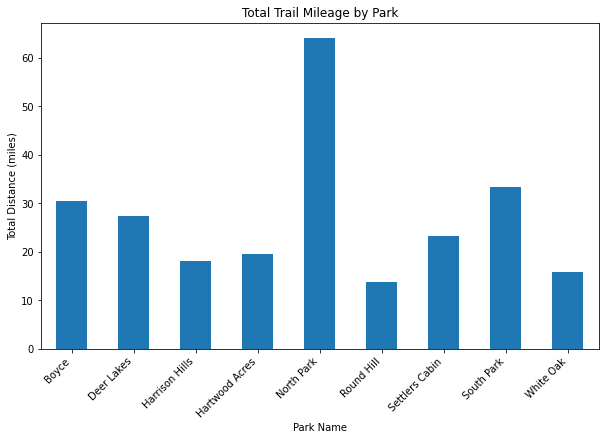

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('trail_locations.csv')
park_totals = df.groupby('park_name')['mileage'].sum()

park_totals.plot(kind='bar', figsize=(10, 6)) 

plt.xlabel('Park Name')
plt.ylabel('Total Distance (miles)')
plt.title('Total Trail Mileage by Park')
plt.xticks(rotation=45, ha='right')
plt.show()

---
## Park Scoring

To score every park, the park with the greatest mileage will stand for 100%. Every other park will be scored by taking its own mileage as a percent out of the mileage of the park with the greatest mileage.

In [6]:
mileages = {}

for park_name in park_totals.index:
    mileage = park_totals.loc[park_name]
    
    if park_name in mileages:
        mileages[park_name] += mileage
    else:
        mileages[park_name] = mileage

scores = {}
for park in mileages:
    scores[park] = round(((mileages[park]*100)/63.97875645), 1)
    
print("Park Scores\n")
for i in scores:
    print("{0:30} {1}".format(i, scores[i]))

Park Scores

Boyce                          47.7
Deer Lakes                     42.7
Harrison Hills                 28.2
Hartwood Acres                 30.7
North Park                     100.0
Round Hill                     21.7
Settlers Cabin                 36.3
South Park                     52.3
White Oak                      24.7


---
# Conclusion

The data shows that North Park has the greatest mileage. These park scores will be added to the scores already given to the parks from their feature capacities, found in the Allegheny County Park Features Analysis notebook. To determine the best neighborhood, for each of the neighborhoods we're judging, the parks within a **24 minute** drive will give their points to that neighborhood and the neighborhood that ends up with the most points will win.